#Reuters dataset Classification

##Data Import and super brief summary

In [1]:
from keras.datasets import reuters

from keras.layers import Embedding
from keras import preprocessing

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test)= reuters.load_data(num_words=10000)

data shape: (8982,)
longest: 2376 words
shortest: 13 words
average: 145 words


(array([2.292e+03, 2.917e+03, 1.098e+03, 8.240e+02, 4.880e+02, 3.410e+02,
        2.480e+02, 1.640e+02, 1.160e+02, 1.180e+02, 7.600e+01, 5.900e+01,
        6.400e+01, 4.300e+01, 4.700e+01, 2.800e+01, 2.500e+01, 1.500e+01,
        1.000e+01, 1.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([  13.  ,   60.26,  107.52,  154.78,  202.04,  249.3 ,  296.56,
         343.82,  391.08,  438.34,  485.6 ,  532.86,  580.12,  627.38,
         674.64,  721.9 ,  769.16,  816.42,  863.68,  910.94,  958.2 ,
        1005.46, 1052.72, 1099.98, 1147.24, 1194.5 , 1241.76, 1289.02,
        1336.28, 1383.54, 1430.8 , 1478.06, 1525.32, 1572.58, 1619.84,
        1667.1 , 1714

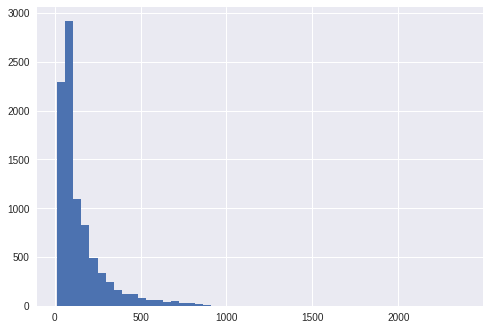

In [0]:
#check the shape and length of input data
import numpy as np


print('data shape:', x_train.shape)
print('longest: %d words' %(max([len(i) for i in x_train])))
print('shortest: %d words'%(min([len(i) for i in x_train])))
print('average: %d words'%(np.mean([len(i) for i in x_train])))

plt.hist([len(i) for i in x_train], bins=50)


##MLP

In [0]:
#data load

max_features=20000
maxlen=16

(x_train, y_train), (x_test, y_test)= reuters.load_data(num_words=max_features)

x_train=preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test=preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model=Sequential()
#contructing a model
model.add(Embedding(10000, 8, input_length=maxlen))
model.add(Flatten())
#model.add(Dense(50, activation='relu'))
model.add(Dense(64, activation='relu'))
#add classifier
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 91,246
Trainable params: 91,246
Non-trainable params: 0
_________________________________________________________________


In [0]:
mlp_model=model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 2s 239us/step - loss: 2.5698 - acc: 0.3294 - val_loss: 2.0917 - val_acc: 0.4296
Epoch 2/10
7185/7185 [==============================] - 1s 150us/step - loss: 1.9601 - acc: 0.4725 - val_loss: 1.9500 - val_acc: 0.4674
Epoch 3/10
7185/7185 [==============================] - 1s 150us/step - loss: 1.8153 - acc: 0.5109 - val_loss: 1.8852 - val_acc: 0.5036
Epoch 4/10
7185/7185 [==============================] - 1s 151us/step - loss: 1.7158 - acc: 0.5429 - val_loss: 1.8539 - val_acc: 0.5109
Epoch 5/10
7185/7185 [==============================] - 1s 153us/step - loss: 1.6277 - acc: 0.5723 - val_loss: 1.8500 - val_acc: 0.5248
Epoch 6/10
7185/7185 [==============================] - 1s 150us/step - loss: 1.5415 - acc: 0.6021 - val_loss: 1.8220 - val_acc: 0.5364
Epoch 7/10
7185/7185 [==============================] - 1s 151us/step - loss: 1.4549 - acc: 0.6271 - val_loss: 1.8139 - val_acc: 0.5370


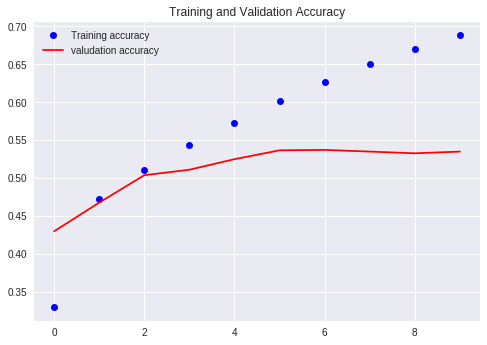

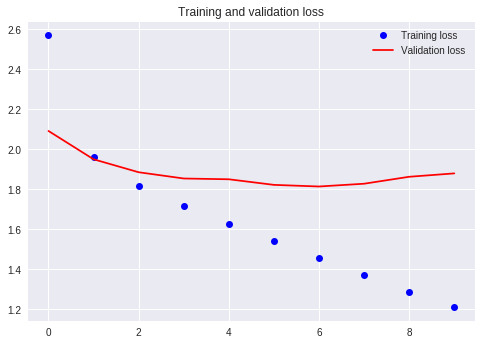

In [0]:
import matplotlib.pyplot as plt

acc = mlp_model.history['acc']
val_acc =mlp_model.history['val_acc']
loss = mlp_model.history['loss']
val_loss = mlp_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label = "valudation accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() 

the performance of pad_sequencec preprocessing is worse than expected, so I tried one-hot vectorization

In [0]:
#one-hot data preprocessing

max_features=10000
#maxlen=16

(x_train, y_train), (x_test, y_test)= reuters.load_data(num_words=max_features)

import numpy as np

def vectorize(seqs, dim=10000):
  results=np.zeros((len(seqs), dim))
  for i, seq in enumerate(seqs):
    results[i, seq]=1
  return(results)

input_train=vectorize(x_train)
input_test=vectorize(x_test)


from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model=Sequential()
#contructing a model
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

#add classifier
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
model.summary()



mlp_model2=model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 64)                640064    
_________________________________________________________________
dense_41 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_42 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_43 (Dense)             (None, 46)                2990      
Total params: 659,630
Trainable params: 659,630
Non-trainable params: 0
_________________________________________________________________
Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 3s 366us/step - loss: 1.4561 - acc: 0.6699 - val_loss: 1.0978 - val_acc: 0.7635
Epoch 2/10
7185/7185 [==============================] - 2s 239us/step - loss: 0.8062

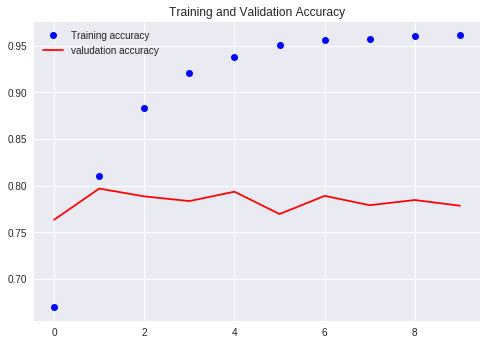

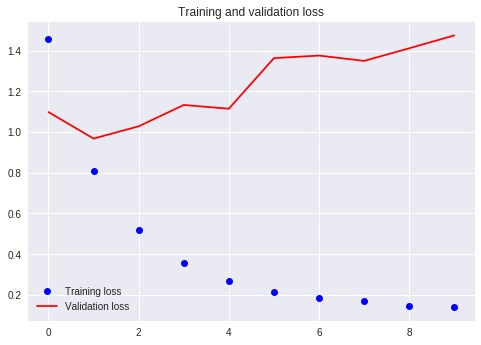

In [0]:
import matplotlib.pyplot as plt

acc = mlp_model2.history['acc']
val_acc =mlp_model2.history['val_acc']
loss = mlp_model2.history['loss']
val_loss = mlp_model2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label = "valudation accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show() 

##Simple RNN

In [5]:
from keras.preprocessing import sequence

max_features=10000
max_len=500
#considering average length of input data, max_len=200 is sufficient for the given dataset.
batch_size=32

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)#, skip_top=5)

#preprocessing x
input_train = sequence.pad_sequences(x_train, maxlen=max_len, truncating='post')
input_test = sequence.pad_sequences(x_test, maxlen=max_len, truncating='post')

#preprocessing y
from keras.utils import to_categorical

y_train = to_categorical(y_train, 46)
y_test = to_categorical(y_test, 46)


print("input shape:", input_train.shape)
print('output shape', y_train.shape)

input shape: (8982, 500)
output shape (8982, 46)


In [0]:
input_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [0]:
from keras.layers import Dense, SimpleRNN, Embedding
from keras.models import Sequential

model=Sequential()
model.add(Embedding(max_features, 500))
model.add(SimpleRNN(128))
#model.add(SimpleRNN(64))
#model.add(Dense(20, activation='sigmoid'))
model.add(Dense(46, activation='sigmoid'))

model.summary()

model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
              metrics=['acc']) 

sRNN_model=model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 500)         5000000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               80512     
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 5,086,446
Trainable params: 5,086,446
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 20s 3ms/step - loss: 3.0434 - acc: 0.3425 - val_loss: 2.4593 - val_acc: 0.3456
Epoch 2/10
7185/7185 [==============================] - 17s 2ms/step - loss: 2.3949 - acc: 0.

In [0]:
sRNN_pred=model.predict(input_test)

In [0]:
sRNN_pred[0]

array([6.0200691e-06, 3.6507845e-05, 3.0636787e-05, 7.3961616e-03,
       5.6885183e-03, 7.1823597e-06, 3.2335520e-05, 3.6090612e-05,
       2.2619963e-05, 6.3210726e-05, 7.0482492e-05, 7.3909760e-06,
       4.6044588e-05, 1.6033649e-05, 1.6093254e-05, 1.3887882e-05,
       5.8174133e-05, 2.5868416e-05, 2.0492077e-04, 2.5546551e-04,
       3.8117170e-05, 8.1121922e-05, 6.5594912e-05, 1.0755658e-04,
       3.6358833e-06, 5.3822994e-05, 5.3882599e-05, 1.4245510e-05,
       3.7819147e-05, 3.7759542e-05, 1.1000037e-04, 2.2378564e-04,
       4.9591064e-05, 3.5166740e-06, 9.2804432e-05, 2.0533800e-05,
       2.3844838e-04, 1.9669533e-05, 3.0100346e-05, 2.9054284e-04,
       7.2509050e-05, 2.8401613e-05, 2.2649765e-06, 5.2392483e-05,
       2.3066998e-05, 4.0709972e-05], dtype=float32)

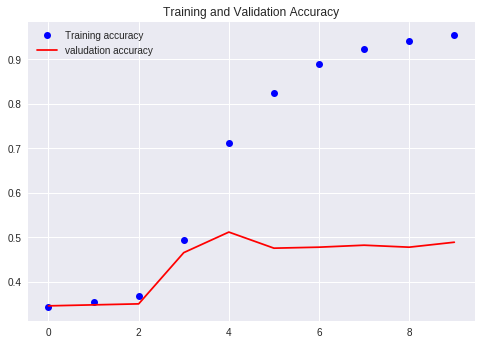

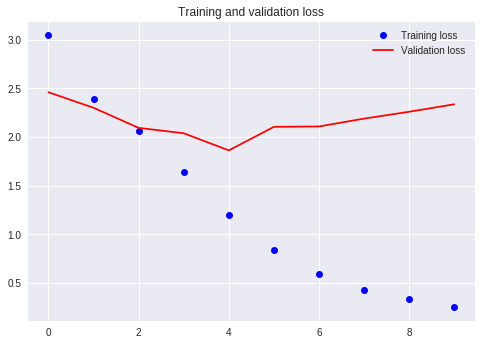

In [0]:
import matplotlib.pyplot as plt

acc = sRNN_model.history['acc']
val_acc = sRNN_model.history['val_acc']
loss =  sRNN_model.history['loss']
val_loss =  sRNN_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label = "valudation accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## LSTM

In [6]:
from keras.preprocessing import sequence

max_features=10000
max_len=500
#considering average length of input data, max_len=500 is sufficient for the given dataset.
batch_size=32

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_features)

#preprocessing x
input_train = sequence.pad_sequences(x_train, maxlen=max_len)
input_test = sequence.pad_sequences(x_test, maxlen=max_len)

#preprocessing y
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


print("input shape:", input_train.shape)
print('output shape', y_train.shape)

input shape: (8982, 500)
output shape (8982, 46)


In [0]:
#adding pad, start, unknown to the index dictionary of reuters

word_idx = reuters.get_word_index()

INDEX_FROM=3 
word_to_id = word_idx
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}

In [13]:
from keras.layers import Dense, LSTM

model=Sequential()
model.add(Embedding(max_features, 500))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

#model.summary()

model.compile(optimizer='rmsprop', 
             loss='categorical_crossentropy',
              metrics=['acc']) 

LSTM_model=model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 7185 samples, validate on 1797 samples
Epoch 1/10
7185/7185 [==============================] - 54s 7ms/step - loss: 2.4364 - acc: 0.4099 - val_loss: 1.9266 - val_acc: 0.5109
Epoch 2/10
7185/7185 [==============================] - 50s 7ms/step - loss: 1.7395 - acc: 0.5705 - val_loss: 1.8027 - val_acc: 0.5593
Epoch 3/10
7185/7185 [==============================] - 50s 7ms/step - loss: 1.5752 - acc: 0.6246 - val_loss: 1.5927 - val_acc: 0.6171
Epoch 4/10
7185/7185 [==============================] - 50s 7ms/step - loss: 1.4024 - acc: 0.6640 - val_loss: 1.4933 - val_acc: 0.6288
Epoch 5/10
7185/7185 [==============================] - 50s 7ms/step - loss: 1.2230 - acc: 0.7006 - val_loss: 1.4196 - val_acc: 0.6489
Epoch 6/10
7185/7185 [==============================] - 50s 7ms/step - loss: 1.0875 - acc: 0.7329 - val_loss: 1.4469 - val_acc: 0.6505
Epoch 7/10
7185/7185 [==============================] - 51s 7ms/step - loss: 0.9570 - acc: 0.7

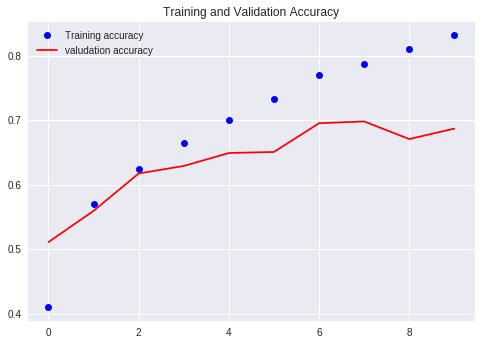

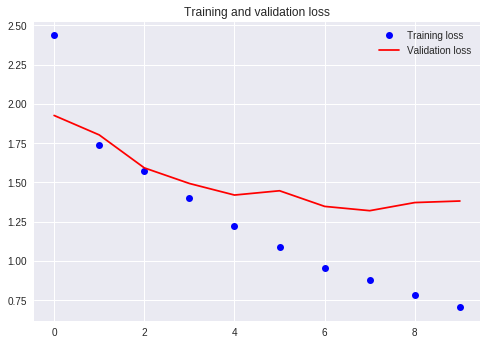

In [14]:
import matplotlib.pyplot as plt

acc = LSTM_model.history['acc']
val_acc = LSTM_model.history['val_acc']
loss =  LSTM_model.history['loss']
val_loss =  LSTM_model.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training accuracy')
plt.plot(epochs,val_acc,'r',label = "valudation accuracy")
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
